In this chapter, we will go over some of the basics of web-scraping techniques using Python. We start our discussion on getting familiar with the internet. The key libraryes we will be discussing includes 'webbrowser', 'requests', and  'Beautiful Soup'. 

In [1]:
import webbrowser
import sys
import requests
import bs4
import os

We start with a simple task first using the 'webbrowser' module. The 'webbrowser' module’s open() function can launch a new browser to a specified URL. Typing the command below will prompt a webpage specified to be opened in your browser:

In [2]:
webbrowser.open('http://inventwithpython.com/')

True

A web browser tab should have been opened to the URL http://inventwithpython.com/ if the command above was executed successfully.

However, this is about the only thing the 'webbrowser' module can do. Even so, the open() function does make some interesting things possible. For example, it’s tedious to copy a street address to the clipboard and bring up a map of it on Google Maps. You could take a few steps out of this task by writing a simple script to automatically launch the map in your browser using the contents of your clipboard. This way, you only have to copy the address to a clipboard and run the script, and the map will be loaded for you.

Next let's talk about the 'requests' module. The 'requests' module lets you easily download files from the web without having to worry about complicated issues such as network errors, connection problems, and data compression. The 'requests' module was originally written because Python’s 'urllib2' module is too complicated to use.

The requests.get() function takes a string of a URL to download. By calling type() on requests.get()’s return value, you can see that it returns a 'Response' object, which contains the response that the web server gave for your request:

In [3]:
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
print('type of res object: ', type(res))
res.status_code == requests.codes.ok
print('res.status_code: ', res.status_code)
print('length of res.text: ', len(res.text), '\n')
print(res.text[:500]) # print the first 500 words

type of res object:  <class 'requests.models.Response'>
res.status_code:  200
length of res.text:  174130 

ï»¿The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet

Author: William Shakespeare

Posting Date: May 25, 2012 [EBook #1112]
Release Date: November, 1997  [Etext #1112]

Language: English


*** S


Let's dissect what happened from the above code. First, the URL goes to a text web page for the entire play of 'Romeo and Juliet' (from project Gutenberg's website). You can tell that the request for this web page succeeded by checking the status_code attribute of the 'Response' object. If it is equal to the value of requests.codes.ok, then everything is fine (incidentally, the status code for "OK" in the HTTP protocol is 200, and you may already be familiar with the 404 status code for "Not Found"). So seeing a status code of 200 means that your request is successful. 

If the request succeeds, the downloaded web page will be stored as a string in the 'Response' object’s text variable. This variable holds a large string of the entire play; the call to len(res.text) shows you that it is more than 178,000 characters long. Finally, calling print(res.text[:500]) displays only the first 500 characters.

As you’ve seen, the 'Response' object has a 'status_code' attribute that can be checked against the object 'requests.codes.ok' to see whether the download succeeded. A simpler way to check for success is to call the raise_for_status() method on the 'Response' object. This will raise an exception if there was an error downloading the file and will do nothing if the download succeeded.

The raise_for_status() method is a good way to ensure that a program halts if a bad download occurs. This is a good thing for Python programmers: you want your program to stop as soon as some unexpected error happens. If a failed download isn’t a deal breaker for your program, you can wrap the raise_for_status() line with try and except statements to handle this error case without crashing. So here is a good practice whenever we do web scraping: no matter how you want to do it, you should always call raise_for_status() after calling requests.get(). You want to be sure that the download has actually worked before your program continues.

In [4]:
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
try:
    res.raise_for_status()
except Exception as exc:
    print('There was a problem: %s' % (exc))

There was a problem: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist


We now study how to save downloaded files to the hard drive. To do so, you must open the file in 'write binary' mode by passing the string 'wb' as the second argument to the function open(). Even if the page is in plaintext (such as the Romeo and Juliet text you downloaded earlier), you still need to write binary data instead of text data in order to maintain the Unicode encoding of the text. Unicode encoding is a character encoding standard that has widespread acceptance. For example, Microsoft software uses Unicode at its core. Basically, computers just deal with numbers. They store letters and other characters by assigning a number for each one.

In [5]:
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
res.raise_for_status()
playFile = open('RomeoAndJuliet.txt', 'wb')
for chunk in res.iter_content(100000):
    playFile.write(chunk)
playFile.close()

The above example involves a very important function. The iter_content() method returns "chunks" of the content on each iteration through the loop. Each "chunk" is of the bytes data type, and you get to specify how many bytes each chunk will contain. One hundred thousand bytes is generally a good size, so pass 100000 as the argument to iter_content().

The file 'RomeoAndJuliet.txt' will now exist in the current working directory. Note that while the file name on the website was "rj.txt", the file on your hard drive has a different file name. The 'requests' module simply handles downloading the contents of web pages. Once the page is downloaded, it is simply data in your program. Even if you were to lose your internet connection after downloading the web page, all the page data would still be on your computer.

The associated write() method returns the number of bytes written to the file. In the previous example, there were 100000 bytes in the first chunk, and the remaining part of the file needed only 78981 bytes.

To further study web scraping, we need to understand HTML better. The reason is because most of the web scraping involves with HTML formats instead of plain text posted on the internet like the Romeo and Juliet example. We now give a brief introduction to HTML format and how it works exactly. 

Hypertext Markup Language (HTML) is the format that web pages are written in. An HTML file is a plaintext file with the ".html" file extension. The text in these files is surrounded by tags, which are words enclosed in angle brackets "<.>". The tags tell the browser how to format the web page. A starting tag and closing tag can enclose some text to form an element. The text (or inner HTML) is the content between the starting and closing tags. For example, the following HTML will display the text string "Hello world!" in the browser, with 'Hello' in bold. The opening "strong" tag says that the enclosed text will appear in bold. The closing "strong" tags tells the browser where the end of the bold text is. The dash sign is used to indicate 'end it here':

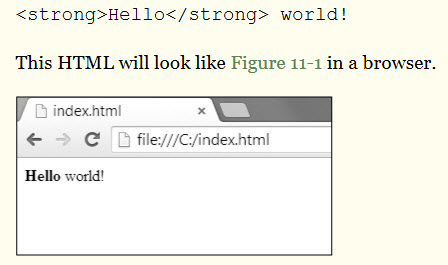

In [6]:
from IPython.display import Image
Image("ch11_snapshot_1.jpg") 

There are many different tags in HTML. Some of these tags have extra properties in the form of attributes within the angle brackets. For example, the "a" tag encloses text that should be a link. Here’s an example:

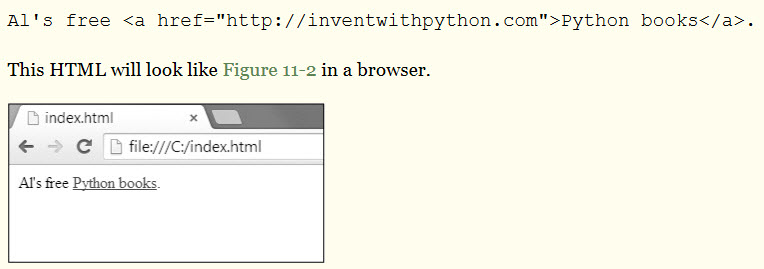

In [7]:
from IPython.display import Image
Image("ch11_snapshot_2.jpg") 

An important skill to gain when we do web scraping is to be able to read the source file of the web pages that your programs will work with. To do this, right-click any web page in your web browser, and select "View Source" or "View page source" to see the HTML text of the page. This is the text your browser actually receives. The browser knows how to display, or render, the web page from this HTML:

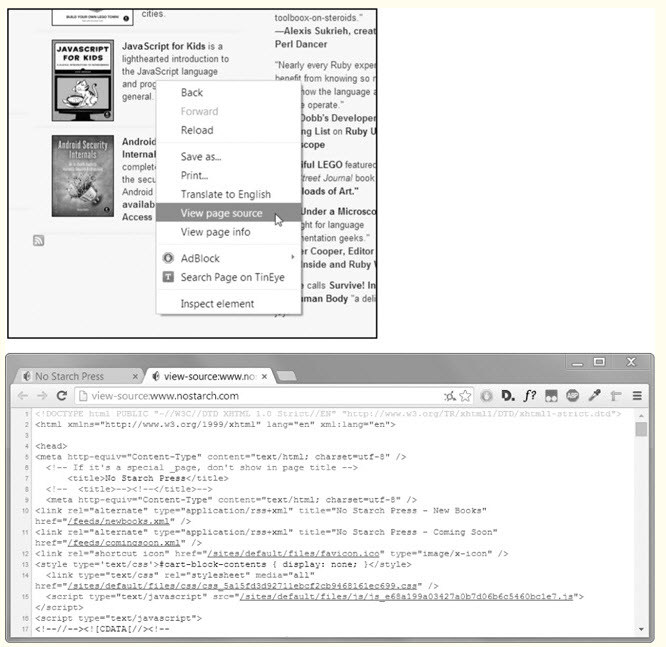

In [8]:
from IPython.display import Image
Image("ch11_snapshot_3.jpg") 

In addition to viewing a web page’s source, you can look through a page’s HTML using your browser’s developer tools.  In Chrome and Internet Explorer for Windows, the developer tools are already installed, and you can press F12 to make them appear. Pressing F12 again will make the developer tools disappear. 

After enabling or installing the developer tools in your browser, you can right-click any part of the web page and select 'Inspect Element' from the context menu to bring up the HTML responsible for that part of the page. This will be helpful when you begin to parse HTML for your web scraping programs.

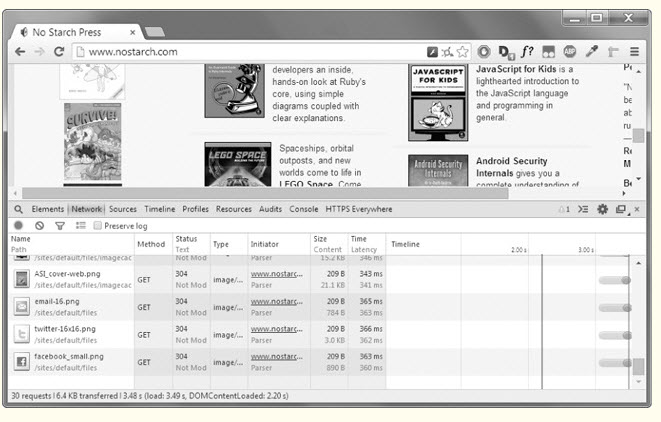

In [9]:
from IPython.display import Image
Image("ch11_snapshot_4.jpg") 

One big cautionary note here: try to stay away from regular expressions at the beginning when you learn web scraping. The reasons are complex. We will not explicitly list them here. 

We now discuss information retrieval. Once your program has downloaded a web page using the "requests" module, you will have the page’s HTML content as a single string value. Now you need to figure out which part of the HTML corresponds to the information on the web page you’re interested in. Thus our 'parsing' journey officially begins here. 

'Beautiful Soup' is a module for extracting information from an HTML page (and is much better for this purpose than regular expressions). The 'Beautiful Soup' module’s name is 'bs4'. The 'Beautiful Soup' examples will parse (i.e., analyze and identify the parts of) an HTML file on the hard drive. The bs4.BeautifulSoup() function needs to be called with a string containing the HTML it will parse. The bs4.BeautifulSoup() function returns is a 'BeautifulSoup' object. 

In [10]:
webbrowser.open('http://nostarch.com')
res = requests.get('http://nostarch.com')
try:
    res.raise_for_status()
except Exception as exc:
    print('There was a problem: %s' % (exc))
soup = bs4.BeautifulSoup(res.text, 'html.parser')
print(type(soup))

<class 'bs4.BeautifulSoup'>


Once we have obtained the 'BeautifulSoup' object, we can print out the HTML code using the prettify() method:

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/_Yd33iVQmzx1XZrSaZuiVTLpv7Y.js">
  </script>
  <link href="https://www.w3.org/1999/xhtml/vocab" rel="profile"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <link href="https://www.nostarch.com/feeds/comingsoon.xml" rel="alternate" title="No Starch Press - Coming Soon" type="application/rss+xml"/>
   <link href="https://www.nostarch.com/sites/default/files/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
   <link href="https://www.nostarch.com/feeds/newbooks.xml" rel="alternate" title="No Starch Press - New Books" type="application/rss+xml"/>
   <link href="/node/14" rel="shortlink"/>
   <meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
   <link href="/index.htm" rel="canonical"/>
   <title>
    No Starch Press | No Starch Press
   </title>
   <link href="https://www.nos

The prettify() method at first may look a bit overwhelming at first. So here are some simple ways to navigate this complex HTML data structure:

In [12]:
print(soup.title)
print(soup.title.string)
print(soup.title.parent.name)

<title>No Starch Press | No Starch Press</title>
No Starch Press | No Starch Press
meta


The 'p' class stands for paragraph. The 'a' class gives you links: 

In [13]:
print(soup.p, "\n")
print(soup.p['class'], "\n")
print(soup.a, "\n")
print(soup.a['class'], "\n")
print(soup.p.string) # the string inside the first paragraph tag

<p class="cart-block-items collapsed uc-cart-empty">There are no products in your shopping cart.</p> 

['cart-block-items', 'collapsed', 'uc-cart-empty'] 

<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a> 

['element-invisible', 'element-focusable'] 

There are no products in your shopping cart.


Now comes the most useful part of the lecture: you can retrieve a web page element from a 'BeautifulSoup' object by calling the select() method and passing a string of a CSS selector for the element you are looking for. CSS selectors are like regular expressions: they specify a pattern to look for, in this case, in HTML pages instead of general text strings. A full discussion of CSS selector syntax is beyond the scope of this lecture, but here’s a short introduction to them (they are just like 'regex' but with a different taste):

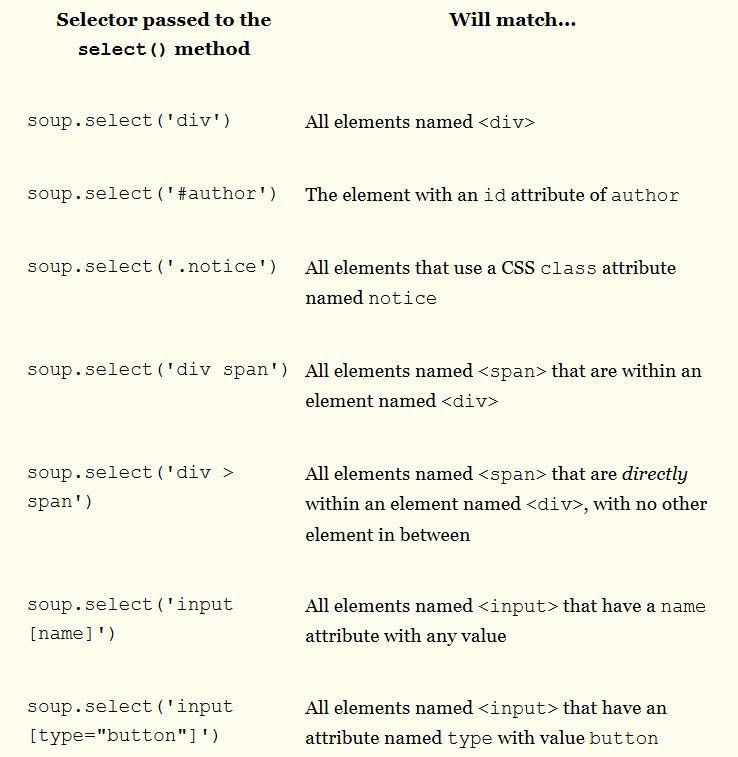

In [14]:
from IPython.display import Image
Image("ch11_snapshot_5.jpg") 

The various selector patterns can be combined to make sophisticated matches. For example, soup.select('p #author') will match any element that has an ID attribute of author, as long as it is also inside a 'p' element.

The select() method will return a list of 'Tag' objects, which is how 'Beautiful Soup' represents an HTML element. The list will contain one 'Tag' object for every match in the 'BeautifulSoup' object’s HTML. 'Tag' values can be passed to the str() function to show the HTML tags they represent. 'Tag' values also have an 'attrs' attribute that shows all the HTML attributes of the tag as a dictionary. 

We now perform a mini-project related to google search. The motivation is simple here. Whenever we search a topic on Google, we don’t look at just one search result at a time. By middle-clicking a search result link, we open the first several links in a bunch of new tabs to read later. we search Google often enough that this workflow—opening our browser, searching for a topic, and middle-clicking several links one by one—is tedious. It would be nice if we could simply type a search term on the command line and have my computer automatically open a browser with all the top search results in new tabs. Let’s write a script to do this, and let's pretend that we are interested in searching google with the keyword 'biotech stocks'.

This is what your program does:
  1. Gets search keywords from the command line arguments.
  2. Retrieves the search results page.
  3. Opens a browser tab for each result.

This means the code will need to do the following:
  1. Read the command line arguments from sys.argv.
  2. Fetch the search result page with the requests module.
  3. Find the links to each search result.
  4. Call the webbrowser.open() function to open the web browser.

In [15]:
print('Googling...', "\n") # display text while downloading the Google page
url='https://www.google.com/search?q=biotech+stocks&sourceid=ie7&rls=com.microsoft:en-US:IE-Address&ie=&oe=&gws_rd=ssl'
res = requests.get(url + ' '.join(sys.argv[1:])) # this is a 'Response' object
res.raise_for_status()
soup = bs4.BeautifulSoup(res.text, "lxml") # retrieve top search result
linkElems = soup.select('.r a') # open a browser tab for each result
numOpen = min(3, len(linkElems)) # open the top three browser tab for each result
for i in range(numOpen):
    webbrowser.open('http://google.com' + linkElems[i].get('href'))

Googling... 



The above example is quite complicated. But here are a few things to be noted. First, you don’t have to know what the CSS class 'r' is or what it does. You’re just going to use it as a marker for the 'a' element you are looking for. You can create a BeautifulSoup object from the downloaded page’s HTML text and then use the selector '.r a' to find all 'a' elements that are within an element that has the 'r' CSS class.

Second, an important function used is the argv() function in the 'sys' module. The goal is that the user will specify the search terms using command line arguments when they launch the program. These arguments will be stored as strings in a list in sys.argv(). The function is quite complicated and we won't elaborate here. The point is that we use this with the search URL to obtain the 'Response' object. 